<a href="https://colab.research.google.com/github/RicoStaedeli/NLP2025_CQG/blob/main/5_Evaluation_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata
import os

In [ ]:
token = userdata.get('GITHUB')
repo_url = f"https://{token}@github.com/RicoStaedeli/NLP2025_CQG.git"

!git clone {repo_url}


os.chdir("NLP2025_CQG")
!ls

Cloning into 'NLP2025_CQG'...
remote: Enumerating objects: 1445, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 1445 (delta 214), reused 149 (delta 101), pack-reused 1136 (from 2)
Receiving objects: 100% (1445/1445), 54.58 MiB | 4.95 MiB/s, done.
Resolving deltas: 100% (816/816), done.
Updating files: 100% (75/75), done.
1_a_Generate_DPO_Dataset.ipynb	      Data
1_Information_preprocessing.md	      Development
1_Preprocessing.ipynb		      Doc
2_Baseline_Generation.ipynb	      Evaluation
2_Information_Baseline_Generation.md  INFORMATION.md
3_Evaluation.ipynb		      LICENSE
4_Finetuned_Generation.ipynb	      README.md
5_Evaluation_Analytics.ipynb	      Training


In [ ]:
import json

# "results_Meta-Llama-3.1-1B-Instruct_SFT_2_schema_prompt_eval"
# "results_Meta-Llama-3.1-8B-Instruct_schema_prompt_eval"
# "results_Meta-Llama-3.1-8B-Instruct_SFT_2_DPO_1_schema_prompt_eval"
result_file = "results_Meta-Llama-3.1-8B-Instruct_schema_prompt_eval"
baseline_file = "results_Meta-Llama-3.1-8B-Instruct_schema_prompt_eval"
sft_file = "results_Meta-Llama-3.1-1B-Instruct_SFT_2_schema_prompt_eval"
dpo_file = "results_Meta-Llama-3.1-8B-Instruct_SFT_2_DPO_1_schema_prompt_eval"

with open(os.path.join(os.getcwd(), f"Evaluation/Scored/{baseline_file}.json"), "r", encoding="utf-8") as f:
    baseline_data = json.load(f)

with open(os.path.join(os.getcwd(), f"Evaluation/Scored/{sft_file}.json"), "r", encoding="utf-8") as f:
    sft_data = json.load(f)

with open(os.path.join(os.getcwd(), f"Evaluation/Scored/{dpo_file}.json"), "r", encoding="utf-8") as f:
    dpo_data = json.load(f)

In [ ]:
import pandas as pd

baseline_rows = []
for entry_id, entry_data in baseline_data.items():
    context = entry_data['input']
    for cq in entry_data['cqs']:
        row = {
            "id": entry_id,
            "input": context,
            "schema": cq["schema"],
            "question": cq["cq"],
            "CauseToEffect": cq["CauseToEffect"],
            "ExpertOpinion": cq["ExpertOpinion"],
            "Analogy": cq["Analogy"],
            "FearAppeal": cq["FearAppeal"],
            "is_critical": cq["is_critical"],
            "passed_rules": cq["passed_rules"],
            "in_context": cq["in_context"]
        }
        baseline_rows.append(row)

baseline_df = pd.DataFrame(baseline_rows)

baseline_df.head()

,id,input,schema,question,CauseToEffect,ExpertOpinion,Analogy,FearAppeal,is_critical,passed_rules,in_context
0,CLINTON_199_2,"CLINTON: ""which may prove to be an intelligenc...",CauseToEffect,Does increased cooperation with the American M...,4.0,3.0,6.0,3,False,True,True
1,CLINTON_199_2,"CLINTON: ""which may prove to be an intelligenc...",ExpertOpinion,Does any credible intelligence agency support ...,0.0,4.0,4.0,2,False,True,True
2,CLINTON_199_2,"CLINTON: ""which may prove to be an intelligenc...",Analogy,Would prioritizing cooperation with Muslim nat...,3.5,2.0,7.5,4,True,True,False
3,CLINTON_199_2,"CLINTON: ""which may prove to be an intelligenc...",FearAppeal,If working closely with Muslim nations and the...,3.0,0.0,4.5,3,False,True,True
4,CLINTON_1_2,"CLINTON: ""If you help create the profits , you...",CauseToEffect,"If the wealthy do not pay their fair share, wi...",5.0,0.0,4.5,3,False,True,False


In [ ]:
sft_rows = []
for entry_id, entry_data in sft_data.items():
    context = entry_data['input']
    for cq in entry_data['cqs']:
        row = {
            "id": entry_id,
            "input": context,
            "schema": cq["schema"],
            "question": cq["cq"],
            "CauseToEffect": cq["CauseToEffect"],
            "ExpertOpinion": cq["ExpertOpinion"],
            "Analogy": cq["Analogy"],
            "FearAppeal": cq["FearAppeal"],
            "is_critical": cq["is_critical"],
            "passed_rules": cq["passed_rules"],
            "in_context": cq["in_context"]
        }
        sft_rows.append(row)

sft_df = pd.DataFrame(sft_rows)

In [ ]:
dpo_rows = []
for entry_id, entry_data in dpo_data.items():
    context = entry_data['input']
    for cq in entry_data['cqs']:
        row = {
            "id": entry_id,
            "input": context,
            "schema": cq["schema"],
            "question": cq["cq"],
            "CauseToEffect": cq["CauseToEffect"],
            "ExpertOpinion": cq["ExpertOpinion"],
            "Analogy": cq["Analogy"],
            "FearAppeal": cq["FearAppeal"],
            "is_critical": cq["is_critical"],
            "passed_rules": cq["passed_rules"],
            "in_context": cq["in_context"]
        }
        dpo_rows.append(row)

dpo_df = pd.DataFrame(dpo_rows)

In [ ]:
dataframes = [baseline_df, sft_df, dpo_df]

In [ ]:
schema_columns = ['CauseToEffect', 'ExpertOpinion', 'Analogy', 'FearAppeal']

schema_mask = dpo_df[schema_columns].ge(7)

conflict_df = dpo_df[schema_mask.sum(axis=1) >= 3]

conflict_df.head(1)

,id,input,schema,question,CauseToEffect,ExpertOpinion,Analogy,FearAppeal,is_critical,passed_rules,in_context
102,Glblwrmingisfak__552,"Glblwrmingisfak: ""What argument?\r\nNobody pro...",Analogy,If banning assault weapons didn't solve the pr...,8.5,2.5,8.0,7,True,True,True


In [ ]:
def schema_mismatch_with_high_alternative(row):
    current_schema = row['schema']
    current_score = row[current_schema]

    # Condition: schema's own score < 7
    if current_score >= 7:
        return False

    # Check if any other schema score is >= 7
    for col in schema_columns:
        if col != current_schema and row[col] >= 7:
            return True

    return False


bad_df = dpo_df[dpo_df.apply(schema_mismatch_with_high_alternative, axis=1)]

# Show the result
bad_df.head(20)

,id,input,schema,question,CauseToEffect,ExpertOpinion,Analogy,FearAppeal,is_critical,passed_rules,in_context
19,CLINTON_223_2,"CLINTON: ""I voted for every sanction against I...",FearAppeal,If Clinton successfully achieved a deal that p...,9.5,2.0,4.0,6,False,True,True
27,CLINTON_231,"CLINTON: ""in fact , his cavalier attitude abou...",FearAppeal,If Clinton views Clinton's attitude about nucl...,5.0,2.0,8.5,3,False,True,True
31,CLINTON_235,"CLINTON: ""It 's a good one , though\r\nIt well...",FearAppeal,"If he did such a great job making peace, why d...",8.5,2.5,4.0,5,False,True,False
32,CLINTON_244_2,"CLINTON: ""If he 's going to criticize a deal t...",CauseToEffect,What if criticizing a deal that has been succe...,6.0,5.0,9.5,5,False,True,False
35,CLINTON_244_2,"CLINTON: ""If he 's going to criticize a deal t...",FearAppeal,If we can't rely on the secrecy of his alterna...,8.5,4.0,4.5,6,False,True,True
47,CLINTON_39,"CLINTON: ""I've been a senator, Donald\r\n...\r...",FearAppeal,If you've been a senator and a secretary of st...,5.0,7.0,7.0,3,False,True,True
55,CLINTON_57,"CLINTON: ""you have no plan\r\nI have written a...",FearAppeal,"If your book ""Stronger Together"" is indeed a c...",9.0,0.0,4.5,5,False,True,True
59,CLINTON_66,"CLINTON: ""what I have proposed would not add a...",FearAppeal,If he claims his proposal would not add to the...,9.0,4.0,5.5,4,False,True,True
63,CLINTON_6_1,"CLINTON: ""we are 5 percent of the world 's pop...",FearAppeal,If we're 5 percent of the world's population a...,8.5,0.0,5.5,3,False,True,True
71,CLINTON_85,"CLINTON: ""let 's start the clock again , Leste...",FearAppeal,If Clinton's proposal would supposedly bring b...,9.0,5.0,5.5,5,False,True,True


In [ ]:
for df in dataframes:
  percent_critical = (df['is_critical'].sum() / len(df)) * 100
  print(percent_critical)

31.85483870967742
65.32258064516128
39.38172043010753


In [ ]:
for df in dataframes:
  in_context_counts = df['in_context'].value_counts()

  # Count True/False in 'passed_rules'
  passed_rules_counts = df['passed_rules'].value_counts()

  print(in_context_counts)
  print(passed_rules_counts)
  print("\n")

in_context
True     472
False    272
Name: count, dtype: int64
passed_rules
True    744
Name: count, dtype: int64


in_context
True     488
False    256
Name: count, dtype: int64
passed_rules
True    744
Name: count, dtype: int64


in_context
True     539
False    205
Name: count, dtype: int64
passed_rules
True    744
Name: count, dtype: int64




In [ ]:
for df in dataframes:
  critical_and_in_context = df[(df['is_critical'] == True) & (df['in_context'] == True)]
  count = len(critical_and_in_context)

  print("Number of entries that are critical and in context:", count)
  percentage = (count / len(df)) * 100

  print(f"Percentage of entries that are both critical and in context: {percentage:.2f}%")

Number of entries that are critical and in context: 132
Percentage of entries that are both critical and in context: 17.74%
Number of entries that are critical and in context: 281
Percentage of entries that are both critical and in context: 37.77%
Number of entries that are critical and in context: 210
Percentage of entries that are both critical and in context: 28.23%


In [ ]:
for df in dataframes:

  df['schema_score'] = df.apply(lambda row: row[row['schema']], axis=1)

  # 2. Group by schema to get total and critical counts
  critical_summary = (
      df.groupby('schema')['is_critical']
      .agg(Total='count', Critical='sum')
      .reset_index()
  )

  # 3. Add accuracy as the proportion of critical questions
  critical_summary['% Critical'] = (critical_summary['Critical'] / critical_summary['Total']) * 100

  # 4. Compute schema score stats
  score_stats = (
      df.groupby('schema')['schema_score']
      .agg(Average_Score='mean', Median_Score='median', Std_Dev='std', Min_Score='min', Max_Score='max')
      .reset_index()
  )

  # 5. Merge the two summaries
  combined_summary = pd.merge(critical_summary, score_stats, on='schema')

  # 6. Sort for readability
  combined_summary = combined_summary.sort_values(by='Average_Score', ascending=False)

  # Display
  display(combined_summary)

,schema,Total,Critical,% Critical,Average_Score,Median_Score,Std_Dev,Min_Score,Max_Score
0,Analogy,186,103,55.376344,6.688172,7.25,1.868536,4.0,10.0
2,ExpertOpinion,186,82,44.086022,5.803763,6.00,2.083510,0.0,10.0
1,CauseToEffect,186,38,20.430108,5.206989,5.00,2.454209,0.0,10.0
3,FearAppeal,186,14,7.526882,4.247312,4.00,1.511440,2.0,10.0


,schema,Total,Critical,% Critical,Average_Score,Median_Score,Std_Dev,Min_Score,Max_Score
2,ExpertOpinion,186,181,97.311828,8.723118,9.0,1.031898,2.0,10.5
1,CauseToEffect,186,147,79.032258,7.811828,8.0,1.652049,0.0,10.0
0,Analogy,186,99,53.225806,7.110215,7.5,2.089860,3.0,10.0
3,FearAppeal,186,59,31.720430,5.489247,5.0,2.418933,2.0,10.0


,schema,Total,Critical,% Critical,Average_Score,Median_Score,Std_Dev,Min_Score,Max_Score
1,CauseToEffect,186,123,66.129032,7.397849,7.50,1.818165,0.0,10.0
2,ExpertOpinion,186,89,47.849462,6.091398,6.25,2.369794,0.0,11.0
0,Analogy,186,67,36.021505,6.045699,5.50,1.814151,4.0,10.0
3,FearAppeal,186,14,7.526882,4.252688,4.00,1.457735,3.0,10.0


<ipython-input-21-ae088330b9a9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schema', y='schema_score', data=df, palette='Set2')


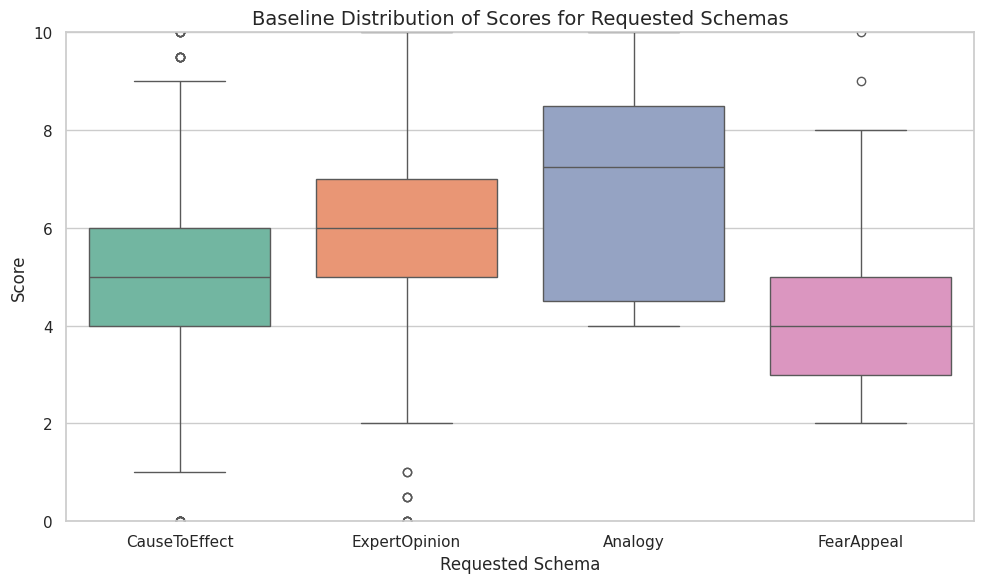

<ipython-input-21-ae088330b9a9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schema', y='schema_score', data=df, palette='Set2')


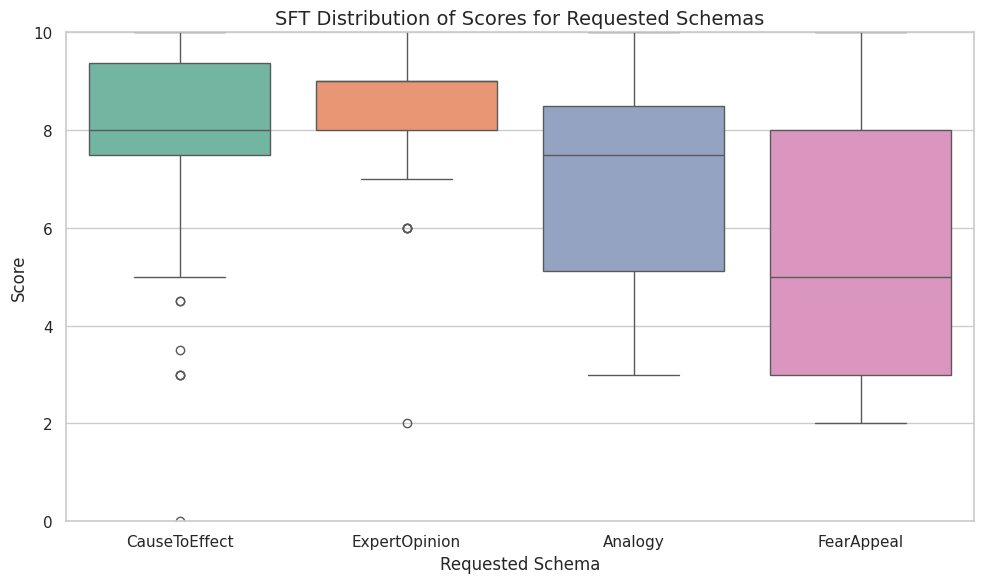

<ipython-input-21-ae088330b9a9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schema', y='schema_score', data=df, palette='Set2')


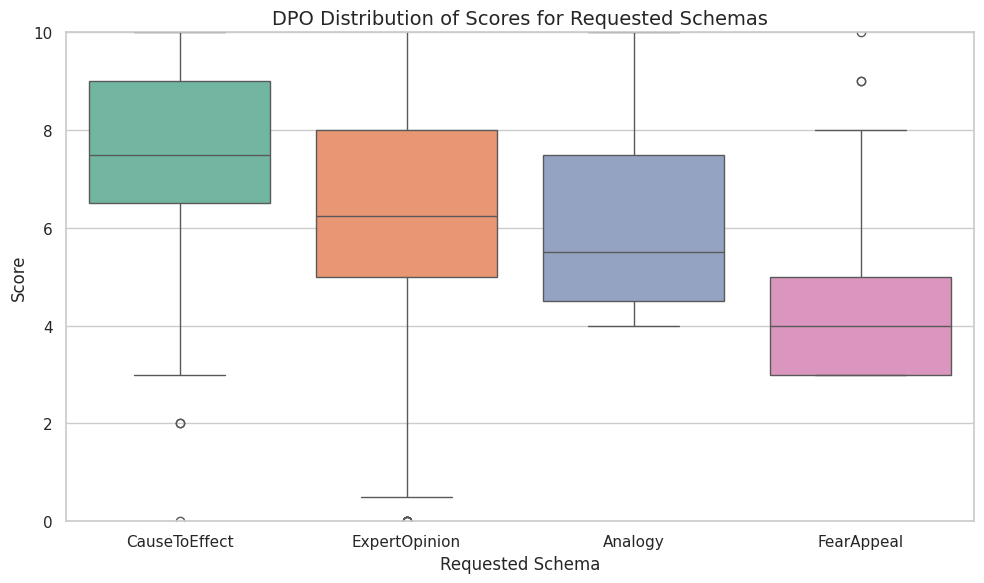

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for i, df in enumerate(dataframes):

  # Make sure schema_score is computed
  df['schema_score'] = df.apply(lambda row: row[row['schema']], axis=1)

  # Set visual style
  sns.set(style="whitegrid")

  # Create the boxplot
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='schema', y='schema_score', data=df, palette='Set2')

  if i == 0:
      name = "Baseline"
  elif i == 1:
    name = "SFT"
  else:
    name = "DPO"

  # Add titles and labels
  plt.title(f'{name} Distribution of Scores for Requested Schemas', fontsize=14)
  plt.xlabel('Requested Schema')
  plt.ylabel('Score')
  plt.ylim(0, 10)
  plt.tight_layout()
  plt.show()

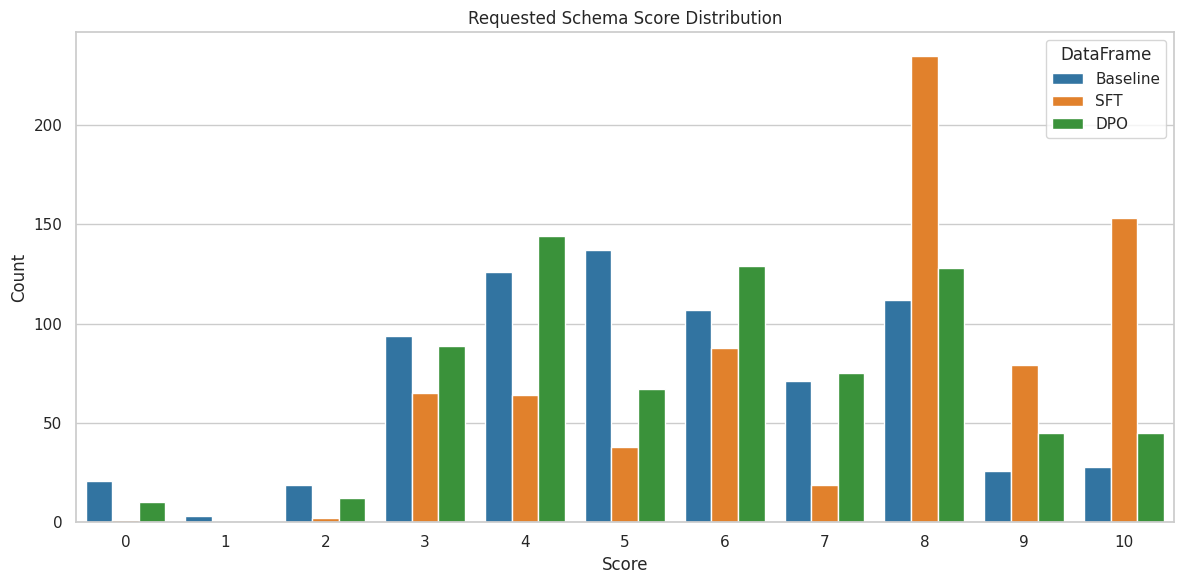

In [ ]:
sns.set(style="whitegrid")

# Collect score data for plotting
plot_data = []

for i, df in enumerate(dataframes):
    # Compute schema_score if not already present
    if 'schema_score' not in df.columns:
        df['schema_score'] = df.apply(lambda row: row[row['schema']], axis=1)

    # Round scores, cap anything above 10
    capped_scores = df['schema_score'].round().clip(upper=10).astype(int)

    # Count occurrences
    score_counts = capped_scores.value_counts().sort_index()

    name = ""

    if i == 0:
      name = "Baseline"
    elif i == 1:
      name = "SFT"
    else:
      name = "DPO"

    # Store results for plotting
    for score, count in score_counts.items():
        plot_data.append({'Score': score, 'Count': count, 'DataFrame': f'{name}'})

# Convert to DataFrame for seaborn
plot_df = pd.DataFrame(plot_data)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='Score', y='Count', hue='DataFrame', palette='tab10')

plt.title('Requested Schema Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(range(0, 11))  # Show 0–10 on x-axis
plt.legend(title='DataFrame')
plt.tight_layout()
plt.show()

<ipython-input-13-176261dcdd86>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index.astype(int), y=score_counts.values, palette='viridis')


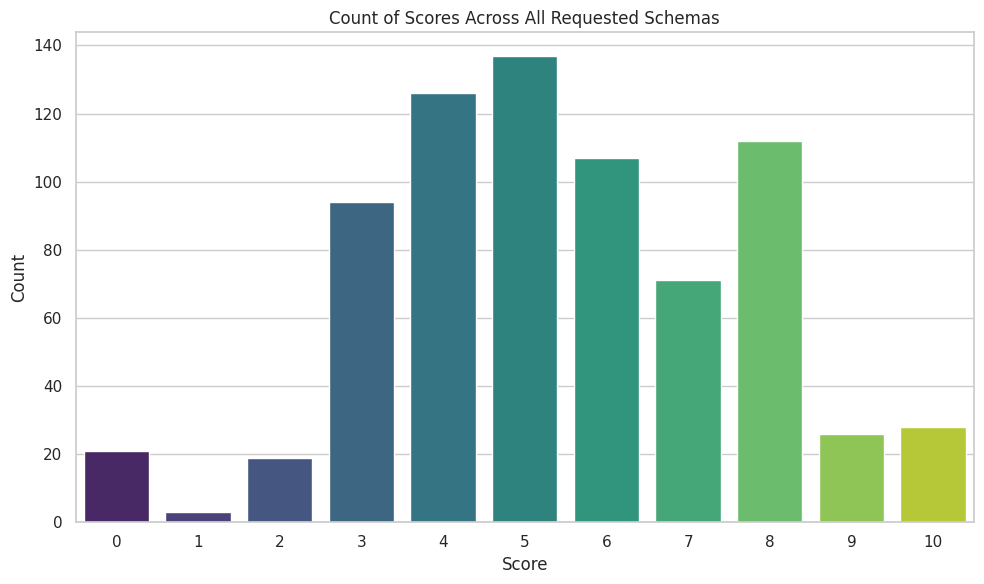

<ipython-input-13-176261dcdd86>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index.astype(int), y=score_counts.values, palette='viridis')


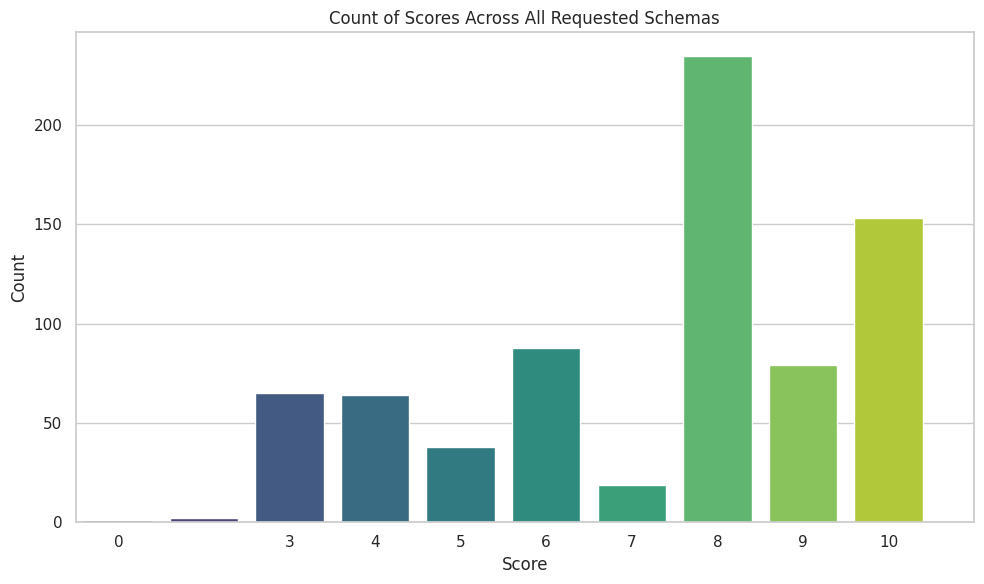

<ipython-input-13-176261dcdd86>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index.astype(int), y=score_counts.values, palette='viridis')


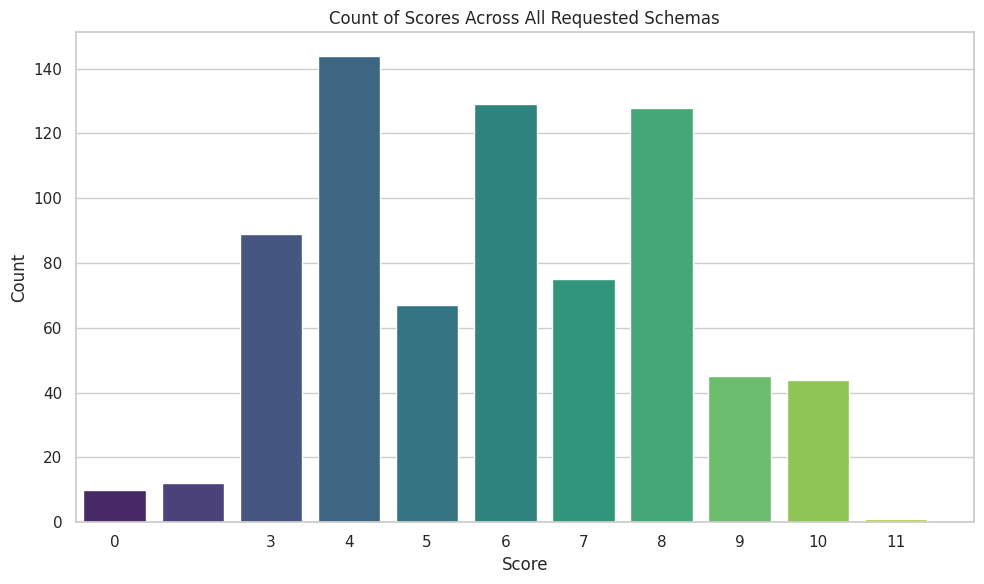

In [ ]:
for df in dataframes:
  # If not already done: Create 'schema_score' column (score for the requested schema)
  df['schema_score'] = df.apply(lambda row: row[row['schema']], axis=1)

  # Count the occurrences of each score (round if needed, assuming integer scores)
  score_counts = df['schema_score'].round().value_counts().sort_index()

  # Plot the bar chart
  plt.figure(figsize=(10,6))
  sns.barplot(x=score_counts.index.astype(int), y=score_counts.values, palette='viridis')

  plt.title('Count of Scores Across All Requested Schemas')
  plt.xlabel('Score')
  plt.ylabel('Count')
  plt.xticks(score_counts.index.astype(int))
  plt.tight_layout()
  plt.show()

Count of questions per schema by is_critical:
is_critical    False  True 
schema                     
Analogy           83    103
CauseToEffect    148     38
ExpertOpinion    104     82
FearAppeal       172     14


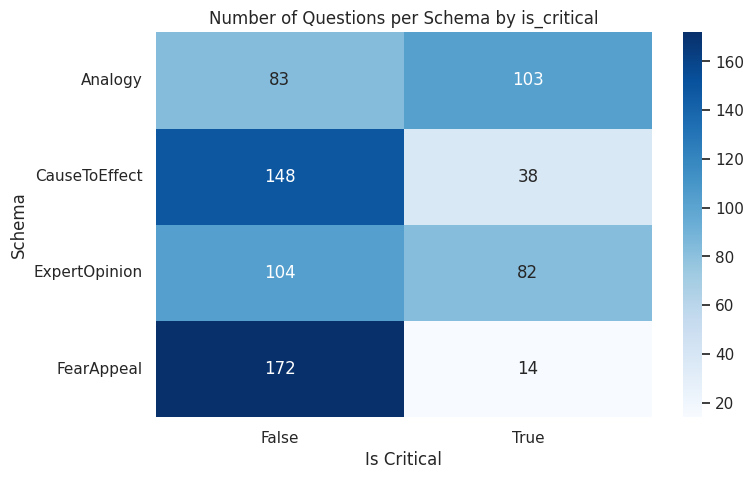

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

counts = pd.crosstab(df['schema'], df['is_critical'])

print("Count of questions per schema by is_critical:")
print(counts)

plt.figure(figsize=(8,5))
sns.heatmap(counts, annot=True, fmt='d', cmap='Blues')
plt.title('Number of Questions per Schema by is_critical')
plt.xlabel('Is Critical')
plt.ylabel('Schema')
plt.show()

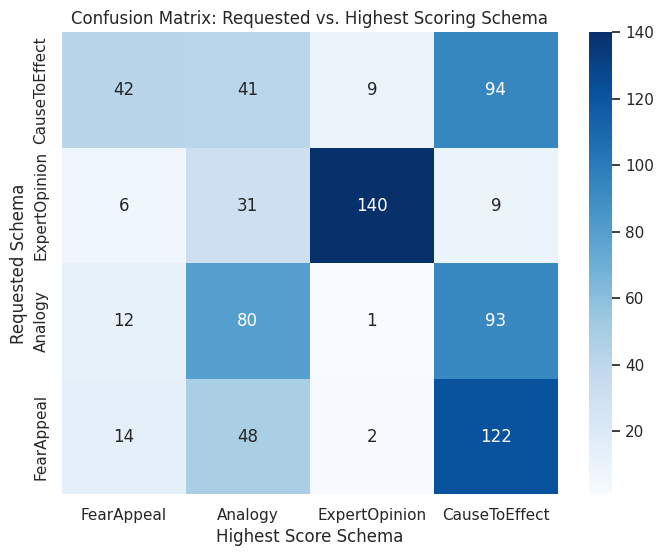

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix


# Original schema list
schemas = ['CauseToEffect', 'ExpertOpinion', 'Analogy', 'FearAppeal']

# Find predicted schema by highest score
df['predicted_schema'] = df[schemas].idxmax(axis=1)

# Compute confusion matrix with original label order
cm = confusion_matrix(df['schema'], df['predicted_schema'], labels=schemas)

# Reverse the predicted schema order (columns)
reversed_schemas = schemas[::-1]

# Reorder columns of confusion matrix
cm_reversed = cm[:, ::-1]

# Plot confusion matrix with reversed predicted schema order
plt.figure(figsize=(8,6))
sns.heatmap(cm_reversed, annot=True, fmt='d', cmap='Blues',
            xticklabels=reversed_schemas, yticklabels=schemas)

plt.xlabel('Highest Score Schema')
plt.ylabel('Requested Schema')
plt.title('Confusion Matrix: Requested vs. Highest Scoring Schema')
plt.show()


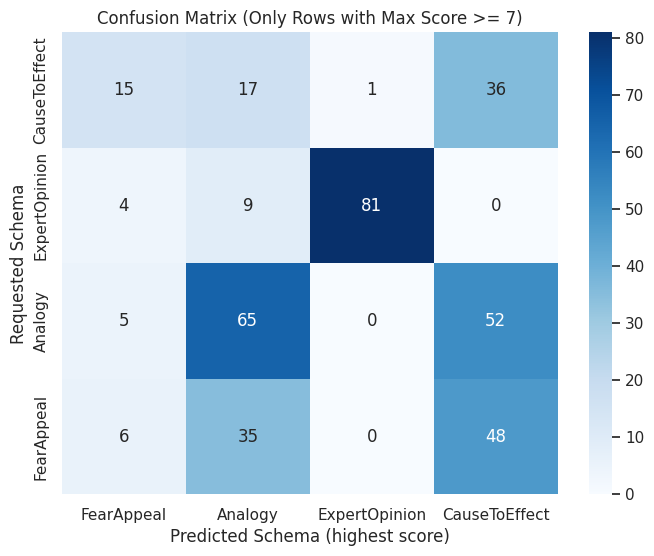

In [ ]:
# Assume df is your dataframe with columns:
# id, input, schema, question, CauseToEffect, ExpertOpinion, Analogy, FearAppeal, is_critical

# Find the highest score and which schema it belongs to
schema_cols = ['CauseToEffect', 'ExpertOpinion', 'Analogy', 'FearAppeal']

# Find max score per row and corresponding predicted schema
df['max_score'] = df[schema_cols].max(axis=1)
df['predicted_schema'] = df[schema_cols].idxmax(axis=1)

# Filter to only rows where max_score >= 7
df_high_score = df[df['max_score'] >= 7]

# Create confusion matrix: actual requested schema vs predicted schema (highest scoring schema)
cm = confusion_matrix(df_high_score['schema'], df_high_score['predicted_schema'], labels=schema_cols)

# Reverse the order of predicted schema for nicer visualization (optional)
cm = cm[:, ::-1]

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=schema_cols[::-1],  # reversed order on x-axis
            yticklabels=schema_cols)
plt.xlabel('Predicted Schema (highest score)')
plt.ylabel('Requested Schema')
plt.title('Confusion Matrix (Only Rows with Max Score >= 7)')
plt.show()


In [ ]:
import pandas as pd

schema_cols = ['CauseToEffect', 'ExpertOpinion', 'Analogy', 'FearAppeal']

def next_highest_schema(row):
    requested_schema = row['schema']
    requested_score = row[requested_schema]

    other_schemas = [s for s in schema_cols if s != requested_schema]
    other_scores = row[other_schemas]

    max_other_score = other_scores.max()
    max_other_schema = other_scores.idxmax()

    return pd.Series({'next_highest_schema': max_other_schema, 'next_highest_score': max_other_score, 'requested_score': requested_score})

# Apply function row-wise
df_next_highest = df.apply(next_highest_schema, axis=1)

# Combine with original df
df_combined = pd.concat([df, df_next_highest], axis=1)

# Now group by 'schema' and aggregate:
summary = df_combined.groupby('schema').agg(
    count=('id', 'size'),
    avg_requested_score=('requested_score', 'mean'),
    avg_next_highest_score=('next_highest_score', 'mean'),
    most_common_next_schema=('next_highest_schema', lambda x: x.mode()[0])
).reset_index()

print(summary)


          schema  count  avg_requested_score  avg_next_highest_score  \
0        Analogy    186             6.688172                6.349462   
1  CauseToEffect    186             5.206989                5.497312   
2  ExpertOpinion    186             5.803763                4.779570   
3     FearAppeal    186             4.247312                6.596774   

  most_common_next_schema  
0           CauseToEffect  
1                 Analogy  
2                 Analogy  
3           CauseToEffect  


In [ ]:
import pandas as pd

schema_cols = ['CauseToEffect', 'ExpertOpinion', 'Analogy', 'FearAppeal']

def next_highest_schema(row):
    requested_schema = row['schema']
    other_schemas = [s for s in schema_cols if s != requested_schema]
    other_scores = row[other_schemas]
    max_other_schema = other_scores.idxmax()
    return max_other_schema

# Apply function to find the schema with highest *next* score for each row
df['next_highest_schema'] = df.apply(next_highest_schema, axis=1)

# Create a crosstab / confusion matrix: rows=requested schema, columns=next highest schema counts
matrix = pd.crosstab(df['schema'], df['next_highest_schema'])

print(matrix)


next_highest_schema  Analogy  CauseToEffect  ExpertOpinion  FearAppeal
schema                                                                
Analogy                    0            155              3          28
CauseToEffect             95              0             16          75
ExpertOpinion            143             21              0          22
FearAppeal                50            133              3           0


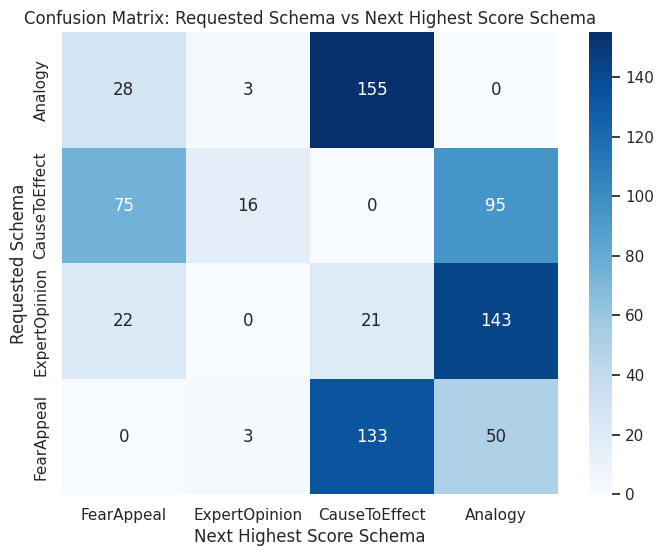

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(matrix[matrix.columns[::-1]], annot=True, fmt='d', cmap='Blues',
            xticklabels=matrix.columns[::-1],
            yticklabels=matrix.index)

plt.xlabel('Next Highest Score Schema')
plt.ylabel('Requested Schema')
plt.title('Confusion Matrix: Requested Schema vs Next Highest Score Schema')
plt.show()


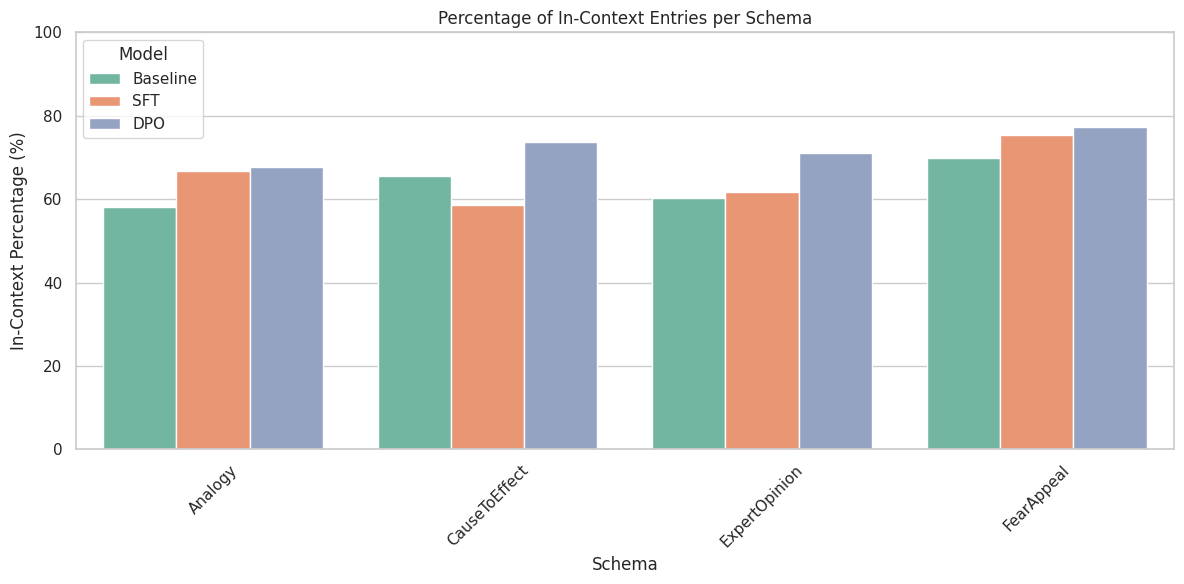

In [ ]:
plot_data = []

# Loop through all models
for i, df in enumerate(dataframes):
    # Label model
    if i == 0:
        name = "Baseline"
    elif i == 1:
        name = "SFT"
    else:
        name = "DPO"

    # Total entries per schema
    total_per_schema = df.groupby('schema').size()

    # In-context entries per schema
    in_context_per_schema = df[df['in_context'] == True].groupby('schema').size()

    # Compute percentage (fill missing with 0)
    percent_in_context = (in_context_per_schema / total_per_schema * 100).fillna(0)

    # Append to plot data
    for schema, percent in percent_in_context.items():
        plot_data.append({
            'Schema': schema,
            'Percentage': percent,
            'Model': name
        })

# Convert to DataFrame for seaborn
plot_df = pd.DataFrame(plot_data)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='Schema', y='Percentage', hue='Model', palette='Set2')

plt.title('Percentage of In-Context Entries per Schema')
plt.xlabel('Schema')
plt.ylabel('In-Context Percentage (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

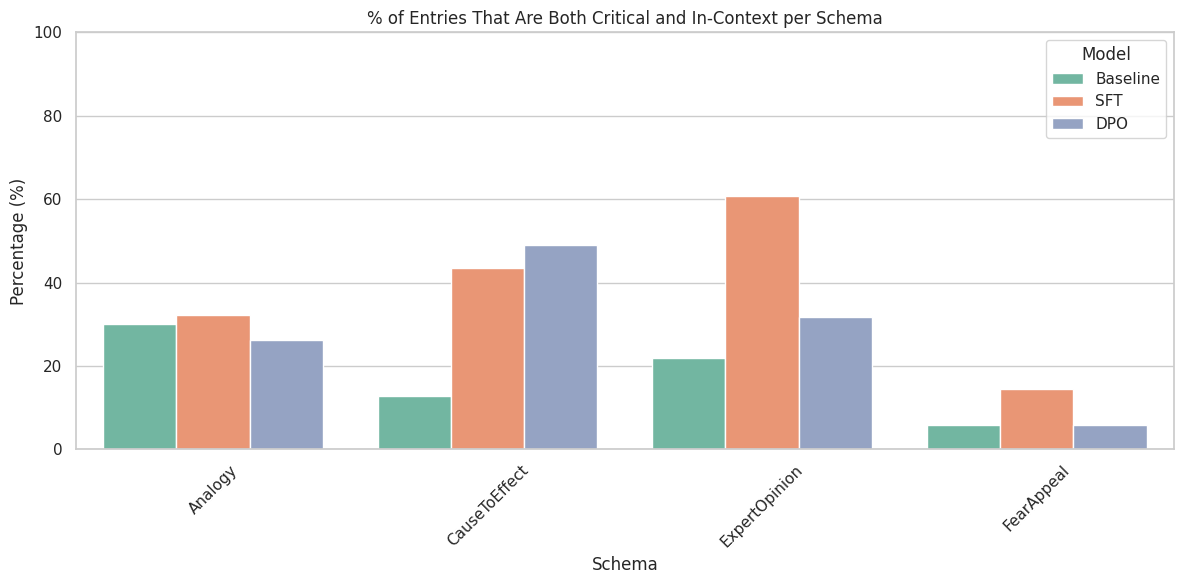

In [ ]:
plot_data = []

# Loop over each DataFrame and compute stats
for i, df in enumerate(dataframes):
    # Name each model
    if i == 0:
        name = "Baseline"
    elif i == 1:
        name = "SFT"
    else:
        name = "DPO"

    # Total entries per schema
    total_per_schema = df.groupby('schema').size()

    # Entries that are both critical and in context
    critical_in_context = df[(df['is_critical'] == True) & (df['in_context'] == True)]
    critical_in_context_per_schema = critical_in_context.groupby('schema').size()

    # Compute percentage
    percent_critical_in_context = (critical_in_context_per_schema / total_per_schema * 100).fillna(0)

    # Store results for plotting
    for schema, percent in percent_critical_in_context.items():
        plot_data.append({
            'Schema': schema,
            'Percentage': percent,
            'Model': name
        })

# Create DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='Schema', y='Percentage', hue='Model', palette='Set2')

plt.title('% of Entries That Are Both Critical and In-Context per Schema')
plt.xlabel('Schema')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()